In [20]:
import sys
import collections

In [2]:
sys.path.append("/Users/alexandrerame/code_repository/codedev/domainbedv2/")

In [3]:
sys.path.append("/Users/alexandrerame/code_repository/notebook/data/")

In [4]:
from diversity.home import home0_im_dn, home_llm, home0_div_rft

In [5]:
%load_ext autoreload
%autoreload 2
from domainbed.codeplot import plot

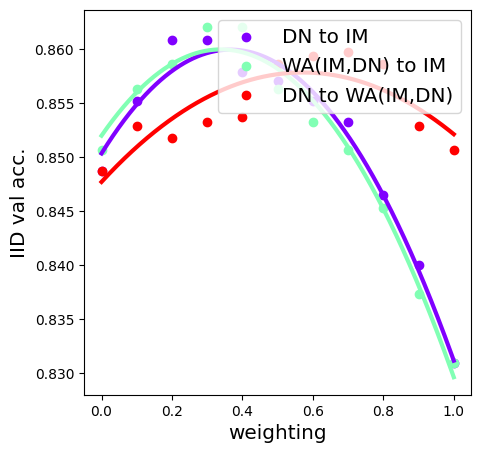

In [35]:
fig_dr = plot.plot_key(home_llm.l, key1="weighting", key2="train_acc", labels=home_llm.labels, order=2)

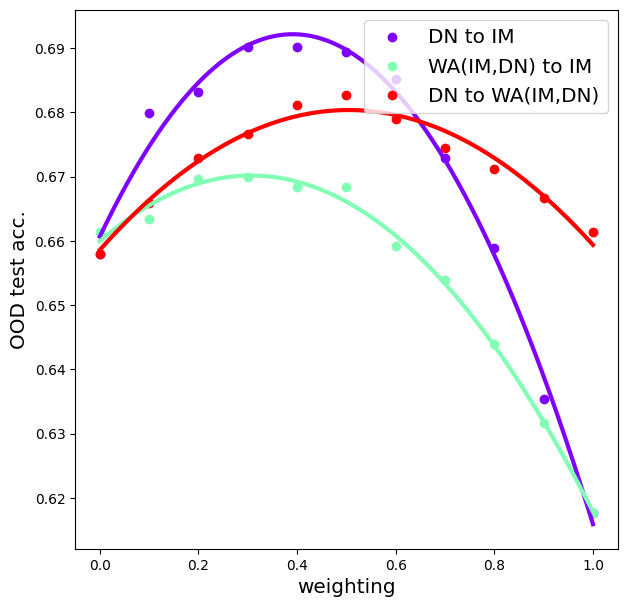

In [6]:
fig_dr = plot.plot_key(home_llm.l, key1="weighting", key2="acc", labels=home_llm.labels, order=2)

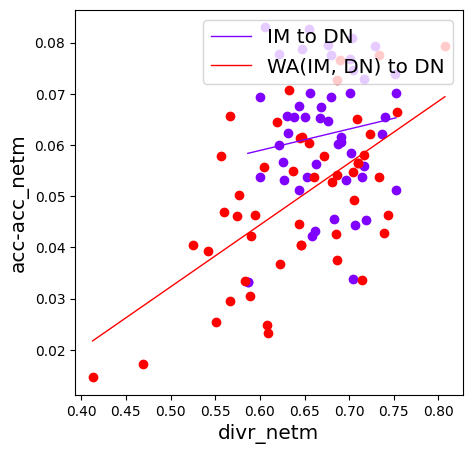

In [41]:
l = [[line for line in c if "acc_netm" in line] for c in list(home0_div_rft.l.values())]

fig_dr = plot.plot_key(l, key1="divr_netm", key2="acc-acc_netm", labels=home0_div_rft.labels)

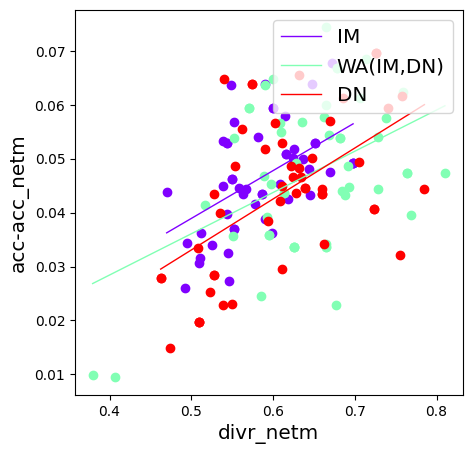

In [38]:
fig_dr = plot.plot_key(home0_im_dn.l, key1="divr_netm", key2="acc-acc_netm", labels=home0_im_dn.labels)

In [27]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
def plot_diversity_aux(l, labels, key, length=None, limits={}):

    plt.rcParams["figure.figsize"] = (5, 5)
    kwargs = dict(alpha=0.5, bins=15, density=True, stacked=True)

    def check_line(line):
        if key not in line:
            return False
        if length is None:
            return True
        return line["length"] == length

    fig = plt.figure()
    keyname = "Feature" if "divf" in key else "Prediction"

    data = []

    if isinstance(l, collections.defaultdict):
        l = list(l)
    for c in l:
        data.append(
            [
                line[key] for line in c if check_line(line)
            ]
        )

    colors = cm.rainbow(np.linspace(0.3, 1, len(labels)))

    for i in range(len(labels)):
        plt.hist(data[i], **kwargs, color=colors[i], label=labels[i])

    plt.gca().set_xlabel(keyname + ' diversity', fontsize="x-large")
    plt.gca().set_ylabel('Frequency (%)', fontsize="x-large")
    if key in limits:
        plt.xlim(limits[key][0], limits[key][1])
    plt.legend(loc="upper right", fontsize="x-large")
    return fig

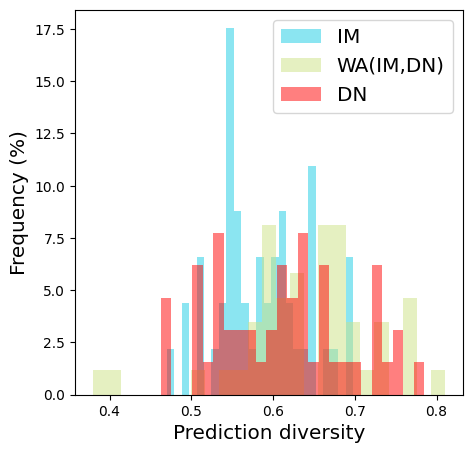

In [9]:
fig = plot_diversity_aux(home0_im_dn.l, labels=home0_im_dn.labels, key="divr_netm", length=None, limits={})

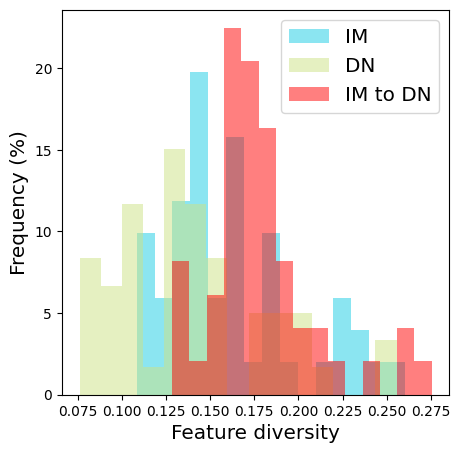

In [45]:
fig = plot_diversity_aux(
    [home0_im_dn.l[0],home0_im_dn.l[2], home0_div_rft.l[0]] ,
    labels=["IM", "DN", "IM to DN"], key="divf_netm", length=None, limits={})

In [34]:
home0_div_rft.labels

['IM to DN', 'WA(IM, DN) to DN']

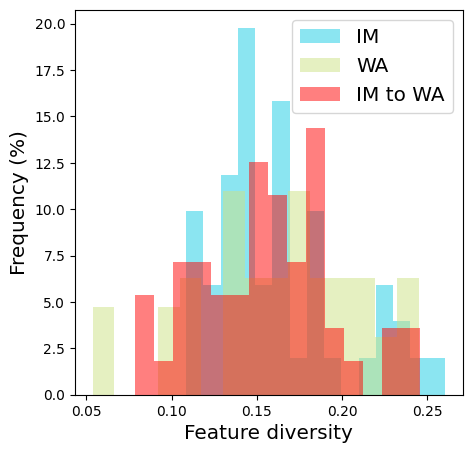

In [44]:
fig = plot_diversity_aux(
    [home0_im_dn.l[0],home0_im_dn.l[1], home0_div_rft.l[1]] ,
    labels=["IM", "WA", "IM to WA"], key="divf_netm", length=None, limits={})

In [30]:
home0_im_dn.labels

['IM', 'WA(IM,DN)', 'DN']

In [ ]:
fig = plot_diversity_aux(list(home0_im_dn.l.values()) + list(home0_div_rft.l.values()), labels=home0_im_dn.labels + home0_div_rft.labels, key="divr_netm", length=None, limits={})

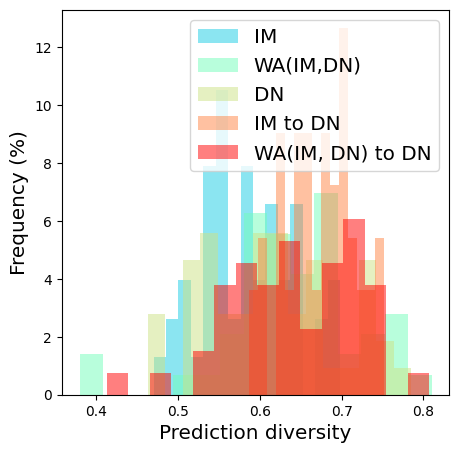

In [28]:
fig = plot_diversity_aux(list(home0_im_dn.l.values()) + list(home0_div_rft.l.values()), labels=home0_im_dn.labels + home0_div_rft.labels, key="divr_netm", length=None, limits={})

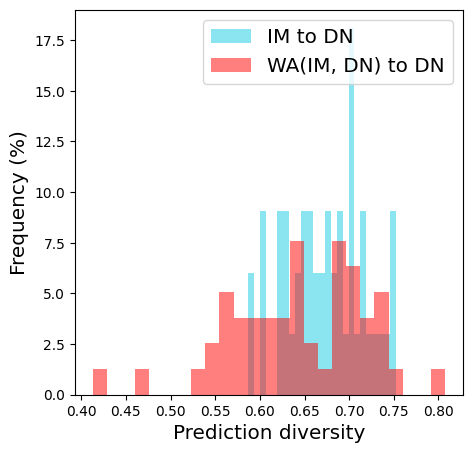

In [12]:
fig = plot_diversity_aux(home0_div_rft.l, labels=home0_div_rft.labels, key="divr_netm", length=None, limits={})

# OLD

In [ ]:
l = plot.merge(home0_im_dn.l)
lsoup = l

In [ ]:
dict_key_to_label["soup-netm"] = "Accuracy gain"

In [ ]:
_dict_key_to_limit = {"soup-netm": [-0.35, 0.12], "dr": [0.35, 1.0], "df": [0., 0.6]}


In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
fig_dr = plot_key(
    l=merge(lsoup, lsoupl, lsoupnosh),
    markers=markers,
    key1="dr",
    key2="soup-netm",
    order="",
    fcard=list(range(2,11)),
    labels=labels,
    colors=colors,
    _dict_key_to_label=dict_key_to_label,
    _dict_key_to_limit=_dict_key_to_limit,
    loc="lower right"
)

In [ ]:
save_fig(fig_dr, "home0_diffrunslargehpnosh_dr_soup-netm.png")

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
fig_df = plot_key(
    l=merge(lsoup),
    markers=markers,
    key1="df",
    key2="soup-netm",
    order="",
    fcard=list(range(2,11)),
    labels=labels,
    colors=colors,
    _dict_key_to_label=dict_key_to_label,
    _dict_key_to_limit=_dict_key_to_limit,
    loc="lower right"
)

In [ ]:
save_fig(fig_df, "home0_diffrunslargehpnosh_df_soup-netm.png")

In [ ]:
THESS=False
dict_key_to_limit_netm = {"net": [0.57, 0.68], "netm": [0.52, 0.68]}
plot.plt.rcParams["figure.figsize"] = (7,5)

fig_ensm210_soup = plot.plot_key(l=plot.merge(lsoup, lsoupl, lsoupnosh), key1="dr", key2="soup-net", order="", label="M=", _dict_key_to_limit=dict_key_to_limit_netm, diag=True, _dict_key_to_label="def", linestyle="dotted", loc="upper left")

# Hessian

In [ ]:
plot.dict_key_to_label["thess"] = "Flatness in test i.i.d."

In [ ]:
THESS = False
EHESS = False
fig_ehess_soup = plot.plot_key(l=plot.merge(lsoup_hps_hessout_ermmixupcoral.lsoup, lsoup_hps_samedata_ermmixupcoral_hess_0413.lsoup), key1="thess", key2="soup-netm", order="", label="M=", _dict_key_to_limit={"hess": [8000, 40000], "soup-netm":[0.02, 0.12]})

In [ ]:
plot.dict_key_to_label["hess"] = "Flatness in test o.o.d."

In [ ]:
lhesssoup = plot.merge(
    lsoup_hpd_ehess.lsoup,
    lsoup_hpeoa_ehess.lsoup,
    #lsoup_hpl_ehess.lsoup,
    lsoup_hps_203601.lsoup_hp203,
    lsoup_hps_203601.lsoup_hp601
)
THESS = True
EHESS = False
fig_ehess_soup = plot.plot_key(l=plot.merge(lhesssoup)[:-1], key1="hess", key2="soup-netm", order="", label="M=", _dict_key_to_limit={"hess": [8000, 40000], "soup-netm":[0.02, 0.12]})

In [ ]:
save_fig(fig_ehess_soup, "diffruns_ehess_soup.png")

In [ ]:
    save_fig(fig_ehess_dr, "diffruns_ehess_dr.png")

In [ ]:
fig_ehess_dr = plot_key(l=merge(lhesssoup)[:-1], key1="hess", key2="dr", order="", label="M=", _dict_key_to_limit={"hess": [8000, 40000], "soup-netm":[0.02, 0.12]})

# Ind acc

In [ ]:
dict_key_to_limit_netm = {"net": [0.52, 0.68], "netm": [0.52, 0.68]}

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (6,6)
fig_netm_soup = plot.plot_key(l=plot.merge(l, lsoup), key1="netm", key2="soup", order=1, label="No", _dict_key_to_limit=dict_key_to_limit_netm, fcard=2, diag=True, _dict_key_to_label="2", linestyle="dotted")

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (6,6)

fig_net_soup = plot.plot_key(l=plot.merge(l, lsoup), key1="net", key2="soup", order=1, label="No", _dict_key_to_limit=dict_key_to_limit_netm, fcard=2, diag=True, _dict_key_to_label="2", linestyle="dotted")

In [ ]:
plot.save_fig(fig_netm_soup, "samediffruns_net2_soup.png")
plot.save_fig(fig_net_soup, "samediffruns_ens2_soup.png")

# Ind acc M from 2 to 9

In [ ]:
THESS=False
dict_key_to_limit_netm = {"net": [0.57, 0.68], "netm": [0.52, 0.68]}
plot.plt.rcParams["figure.figsize"] = (7,5)

fig_ensm210_soup = plot.plot_key(l=plot.merge(l, lsoup)[:-1], key1="net", key2="soup", order="", label="M=", _dict_key_to_limit=dict_key_to_limit_netm, diag=True, _dict_key_to_label="def", linestyle="dotted", loc="upper left")

In [ ]:
plot.save_fig(fig_ensm210_soup, "home0_samediffruns210_ens_wa_57.png")

# Diversity with mixup

In [ ]:
lsoupemc = plot.merge(
    lsoup_hps_hessout_ermmixupcoral.lsoup,
    lsoup_hps_samedata_ermmixupcoral_hess_0413.lsoup,
    lsoup_hps_env0_div2_ermmixupcoral.lsoup,
)

In [ ]:
 _dict_key_to_limit = {"df": [0.1, 0.6], "dr": [0.1, 0.9], "soup-netm": [0, 0.12]}

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (10,7)
fig = plot.plot_key(l=plot.merge(lsoupemc), key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit=_dict_key_to_limit)

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (10,7)
fig = plot.plot_key(l=plot.merge(lsoup), key1="df", key2="soup-netm", order=1, label="M=", _dict_key_to_limit=_dict_key_to_limit)

In [ ]:
lsoupemc = plot.merge(
    lsoup_hps_hessout_ermmixupcoral.lsoup,
    lsoup_hps_samedata_ermmixupcoral_hess_0413.lsoup,
    lsoup_hps_env0_div2_ermmixupcoral.lsoup, combinhome0_emvc_hpx_0412.lsoup
)

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (10,7)
fig = plot.plot_key(l=plot.merge(l, lsoup), key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit=_dict_key_to_limit)

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (10,7)
fig = plot.plot_key(l=plot.merge(lsoupemc, lsoup, combinhome0_emvc_hpx_0412.lsoup), key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit={})

In [ ]:
keydir = "erm_erm"

In [ ]:
fig = plot.plot_key(l=[[], [], [l for l in combinhome0_emvc_hpx_0412.lsoup[2] if keydir in l["dirs"]]], key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit={})

In [ ]:
fig = plot.plot_key(l=[[], [], [l for l in combinhome0_emvc_hpx_0412.lsoup[2] if keydir in l["dirs"]]], key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit={})

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (10,7)
fig = plot.plot_key(l=plot.merge(g), key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit={})

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (10,7)
fig = plot.plot_key(l=plot.merge(lsoup, lsoupemc), key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit={})

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (7,7)
fig = plot.plot_key(l=plot.merge(l, lsoup), key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit={})

# Diversity ENS

In [ ]:
plot.dict_key_to_label["net-netm"] = "Accuracy gain"
THESS=False
_dict_key_to_limit["net-netm"] = [0.012, 0.05]
_dict_key_to_limit["net-netm"] = [0.022, 0.062]
_dict_key_to_limit["dr"] = [0.42, 0.65]
plot_l = plot.merge(l)[:-1]
#plot_l[5], plot_l[3] = plot_l[3], plot_l[5]
plot.plt.rcParams["figure.figsize"] = (8,5.5)
fig_dr = plot.plot_key(l=plot_l, key1="dr", key2="soup-netm", order=1, fcard=3, label="M=", _dict_key_to_limit=_dict_key_to_limit, loc="upper left")



# Diversity WA single run

In [ ]:
_dict_key_to_limit = {"dr": [0.4, 0.7], "soup-netm": [0.02, 0.1], "df": [0, 0.7]}

In [ ]:
from data.home import lswa_hpd, l_nodrop, l_drop, l_hpeoa, lswa_hpl, lswa_hpl_v2
lswa_hpl_l = [
    ll if i in [3] else (
        lswa_hpl_v2.l[i] if i in [5,9]
        else (
            lswa_hpd.l[i] if i in [8] else [])) for i, ll in enumerate(lswa_hpl.l)]

l = plot.merge(l_nodrop.l, l_drop.l, l_hpeoa.l, lswa_hpd.l,lswa_hpl_l)

In [ ]:
THESS=False
plot_l = plot.merge(l)[:-1]
#plot_l[5], plot_l[3] = plot_l[3], plot_l[5]
plot.plt.rcParams["figure.figsize"] = (8,5.5)
fig_dr = plot.plot_key(l=plot_l, key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit=_dict_key_to_limit, loc="upper left")

In [ ]:
plot.plot_key??

In [ ]:
plot.dict_key_to_label["soup-netm"] = "Accuracy gain"

In [ ]:
THESS=False
_dict_key_to_limit["net-netm"] = [0.012, 0.078]
plot_l = plot.merge(l)[:-1]
#plot_l[5], plot_l[3] = plot_l[3], plot_l[5]
plot.plt.rcParams["figure.figsize"] = (8,5.5)
fig_dr = plot.plot_key(l=plot_l, key1="dr", key2="net-netm", order=1, label="M=", _dict_key_to_limit=_dict_key_to_limit, loc="upper left")

In [ ]:

plot.save_fig(fig_dr, "home0_sameruns_dr_soup-net.png")

In [ ]:
THESS=False
plot_l = plot.merge(l)[:-1]
dict_key_to_limit_netm = {"net": [0.575, 0.67], "soup": [0.575, 0.68]}
plot.plt.rcParams["figure.figsize"] = (7,5)

fig_net_soup_singleruns = plot.plot_key(l=plot_l, key1="net", key2="soup", order="", label="M=", _dict_key_to_limit=dict_key_to_limit_netm, diag=True, _dict_key_to_label="def", linestyle="dotted", loc="upper left")

In [ ]:
plot.save_fig??

In [ ]:
plot.save_fig(fig_net_soup_singleruns, "home0_sameruns_net_soup.png")

# Diversity with ERM

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (8,5.5)
_dict_key_to_limit["soup-netm"] = [0.03, 0.102]
_dict_key_to_limit["dr"] = [0.45, 0.7]
fig_dr = plot.plot_key(l=plot.merge(l, lsoup)[:-1], key1="dr", key2="soup-netm", order=1, label="M=", fcard=3, _dict_key_to_limit=_dict_key_to_limit, loc="upper left")

In [ ]:

plot.save_fig(fig_dr, "home0_samediffruns_dr_soup-netm_m3.png")

In [ ]:
THESS=False
_dict_key_to_limit = {}
plot.plt.rcParams["figure.figsize"] = (8,5.5)
fig_dr = plot.plot_key(l=plot.merge(l, lsoup)[:-1], key1="dr", key2="soup-netm", order=1, label="M=", _dict_key_to_limit=_dict_key_to_limit, loc="upper left")

In [ ]:

plot.save_fig(fig_dr, "home0_samediffruns_dr_soup-netm.png")

In [ ]:
THESS=False
plot.plt.rcParams["figure.figsize"] = (7,7)
fig_df = plot.plot_key(l=plot.merge(l, lsoup)[:-1], key1="df", key2="soup-netm", order=1, label="M=", _dict_key_to_limit=_dict_key_to_limit, loc="lower right")

In [ ]:
plot.save_fig(fig_df, "home0_samediffruns_df_soup-netm_77.png")

In [ ]:
plot.save_fig(fig_slope, "home0_m_slope.png")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.pyplot as plt


In [ ]:

def plot_slopes_c():
    fig = plt.figure()
    dr = [0, 116, 174, 196, 208, 235, 259, 282, 297]
    dr = [d/1000 for d in dr]
    df = [0, 68, 103, 121, 114, 130, 128, 159, 179]
    df = [d/1000 for d in df]
    m = list(range(1, 10))

    colors = cm.rainbow(np.linspace(0.2, 1, 2))
    plt.scatter(m, dr, label="Prediction diversity", color=colors[0])
    plot.fit_and_plot_with_value(m, dr, order="log", label=None, color=colors[0], ax=None)
    plt.scatter(m, df, label="Feature diversity", color=colors[1])
    plot.fit_and_plot_with_value(m, df, order="log", label=None, color=colors[1], ax=None)
    plt.xlabel("M", fontsize="x-large")
    plt.ylabel(r"Slope",  fontsize="x-large")
    plt.legend(fontsize="x-large")
    return fig
plot.plt.rcParams["figure.figsize"] = (8,5)
fig_slope = plot_slopes_c()
plot.save_fig(fig_slope, "home0_m_slope.png")

# Old

In [ ]:

def plot_markers(l1, l2, key1, key2, order=1, diag=False):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_without_int(l, color, label, marker):
        t = get_x(l, key1)
        if t == []:
            return
        plt.scatter(get_x(l, key1), get_x(l, key2), color=color, label=label, marker=marker)

    def plot_with_int(l, color):
        if order == 1:
            m, b = np.polyfit(get_x(l, key1), get_x(l, key2), 1)
            plt.plot(get_x(l, key1), m * np.array(get_x(l, key1)) + b, color=color)#, label=label +": " + "{:.0f}".format(m*1000))
        elif order == 2:
            m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 2)
            get_x1_sorted = sorted(get_x(l, key1))
            preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(get_x1_sorted, preds, color=color)# label="int."+label)
        elif order == 3:
            m3, m2, m1, b = np.polyfit(get_x(l, key1), get_x(l, key2), 3)
            get_x1_sorted = sorted(get_x(l, key1))
            preds = m3 * np.array(get_x1_sorted)**3 + m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(get_x1_sorted, preds, color=color)# label="int."+label)
        elif order == "2log":
            m2, m1, b = np.polyfit(np.log(get_x(l, key1)), get_x(l, key2), 2)
            get_x1_sorted = np.log(sorted(get_x(l, key1)))
            preds = m2 * np.array(get_x1_sorted)**2 + m1 * np.array(get_x1_sorted) + b
            plt.plot(sorted(get_x(l, key1)), preds, color=color)# label="int."+label)

    colors1 = cm.Blues(np.linspace(0, 1, len(l1)))
    colors2 = cm.Reds(np.linspace(0, 1, len(l2)))
    labels1 = ["swa" + str(i) for i in range(len(l1))]
    labels2 = ["soup" + str(i) for i in range(len(l1))]
    for card in range(len(l1)):
        if l1[card] == []:
            continue
        plot_without_int(l1[card], color=colors1[card], label=labels1[card], marker=".")
        plot_with_int(l1[card] + l2[card], color=colors1[card])
    for card in range(len(l2)):
        if l2[card] == []:
            continue
        plot_without_int(l2[card], color=colors2[card], label=labels2[card], marker="*")
    if diag:
        xpoints = ypoints = plt.xlim()
        plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False, label="y=x")

    plt.legend()

In [ ]:
plot_key3(key1="netm", key2="soup", order=2, key3="df")

In [ ]:

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

all_l = [x for ll in l[-3:] for x in ll]    
Xi = get_x(all_l, "netm")
Yi = get_x(all_l, "df")
Zi = get_x(all_l, "soup")

In [ ]:
set_xy = set([])
indexes = []
for i, (x, y) in enumerate(zip(Xi, Yi)):
    if (x, y) not in set_xy:
        set_xy.add((x, y))
        indexes.append(i)


Pf = np.array([[Xi[i], Yi[i]] for i in indexes])
Zf = np.array([Zi[i] for i in indexes])
Nf = len(indexes)

In [ ]:
x_mesh = np.linspace(0.55, 0.65, 100)
y_mesh = np.linspace(0.1, 0.2, 100)
X, Y = np.meshgrid(x_mesh, y_mesh)
P = np.array([X.flatten(), Y.flatten() ]).transpose()

In [ ]:
from scipy.interpolate import griddata
Z_cubic = griddata(Pf, Zf, P, method = "cubic").reshape([100, 100])

In [ ]:
Z_nearest = griddata(Pf, Zf, P, method = "cubic").reshape([100, 100])
plt.contourf(X, Y, Z_nearest, 50)
plt.plot(Xi, Yi, "or", label = "Data")
plt.colorbar()
plt.legend()
plt.grid()
plt.show()

In [ ]:
plot_key3(key1="netm", key2="df", key3="soup", order=1)

In [ ]:
def plot_key3(key1, key2, key3=None, order=1):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, label, key3=None, order=None):
        t = get_x(l, key1)
        if t == []:
            return
        if key3:
            c = get_x(l, key3)
            cmap = plt.cm.get_cmap("Reds", 6)

        if order == 1:
            m, b = np.polyfit(get_x(l, key1), get_x(l, key2), 1)
            plt.plot(get_x(l, key1), m * np.array(get_x(l, key1)) + b, label=label +": " + "{:.0f}".format(m*1000))
            if key3:
                plt.scatter(get_x(l, key1), get_x(l, key2), c=c, cmap=cmap)

        elif order == 2:
            m2, m1, b = np.polyfit(x(l, key1), x(l, key2), 2)
            x1_sorted = sorted(x(l, key1))
            preds = m2 * np.array(x1_sorted)**2 + m1 * np.array(x1_sorted) + b
            plt.plot(x1_sorted, preds, label=label)# label="int."+label)
            if key3:
                plt.scatter(x(l, key1), x(l, key2), c=c, cmap=cmap)

    for card in range(9, 11):
        plot_with_int(l[card], label="swa" + str(card), order=0)

    plot_with_int([x for card in range(1, 10) for x in l[card]], label="all", key3=key3, order=order)
    cbar = plt.colorbar()
    cbar.set_label(dict_key_to_label.get(key3, key3))
    plt.legend()

In [ ]:
def plot_key_mash(key1, key2, key3=None, order=1):

    plt.xlabel(dict_key_to_label.get(key1, key1))
    plt.ylabel(dict_key_to_label.get(key2, key2))

    def plot_with_int(l, label, order=None):
        t = x(l, key1)
        if t == []:
            return

        if order == 1:
            m, b = np.polyfit(x(l, key1), x(l, key2), 1)
            plt.plot(x(l, key1), m * np.array(x(l, key1)) + b, label=label +": " + "{:.0f}".format(m*1000))

        elif order == 2:
            m2, m1, b = np.polyfit(x(l, key1), x(l, key2), 2)
            x1_sorted = sorted(x(l, key1))
            preds = m2 * np.array(x1_sorted)**2 + m1 * np.array(x1_sorted) + b
            plt.plot(x1_sorted, preds, label=label)# label="int."+label)

    for card in range(8, 11):
        plot_with_int(l[card], label="swa" + str(card), order=0)

    all_l = [x for ll in l for x in ll]    
    z = x(all_l, key3)
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()
    
    plt.pcolormesh(x(all_l, key1), x(all_l, key2), z, cmap='RdBu', vmin=z_min, vmax=z_max)
    #ax.set_title('pcolormesh')
    #cbar.set_label(dict_key_to_label.get(key3, key3))
    plt.legend()

In [ ]:

def plot_slopes_c():
    fig = plt.figure()
    dr = [96, 177, 202, 207, 236, 258, 303, 312]
    dr = [d/1000 for d in dr]
    df = [52, 105, 135, 134, 158, 158, 203, 229]
    df = [d/1000 for d in df]
    m = list(range(2, 10))
    plt.scatter(m, dr, label="Prediction diversity", color="blue")
    fit_and_plot_slope(m, dr, order="log", label=None, color="blue", ax=None)
    plt.scatter(m, df, label="Feature diversity", color="red")
    fit_and_plot_slope(m, df, order="log", label=None, color="red", ax=None)
    plt.xlabel(dict_key_to_label["length"], fontsize="x-large")
    plt.ylabel(r"Slope",  fontsize="x-large")
    plt.legend()
    return fig
fig = plot_slopes_c()
save_fig(fig, "m_slope.png")